In [27]:
import itertools
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
import yacs

import context
from builders import build_grade_model
from models import GradeModel
from config import get_config

In [151]:
MODEL_PATH = "../checkpoints/quality-assessment-v2/checkpoint_77800.pth"
CONFIG_PATH = "../logs/quality-assessment-v2/config.yaml"

In [152]:
state_dict = torch.load(MODEL_PATH, map_location="cpu", weights_only=True)["model"]

In [153]:
config = get_config(CONFIG_PATH)

In [154]:
model = build_grade_model(config)

In [155]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [156]:
model.stages[1][0].dwconv

Conv2d(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=same, groups=64)

In [165]:
filters = model.stages[0][0].dwconv.weight


In [166]:
filters.shape

torch.Size([32, 1, 7, 7])

IndexError: index 32 is out of bounds for dimension 0 with size 32

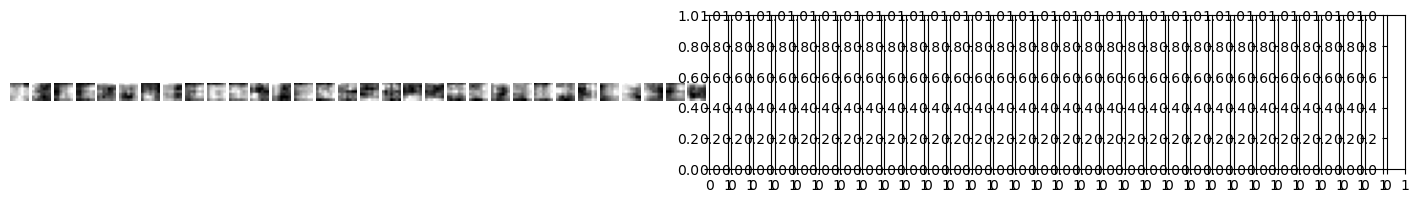

In [167]:
fig, axs = plt.subplots(1, 64, figsize=(18, 2), squeeze=False)

for i, j in itertools.product(range(64), range(1)):

    axs[j,i].imshow(filters[i,j].detach().numpy(), cmap="gray")
    axs[j,i].set_axis_off()

In [144]:
pp = torch.load("../data/PixelwiseJPEGCompressionDetection-params.pth")

/var/folders/89/b5lh60hs3x1g1db4v2dx04980000gn/T/ipykernel_24229/3357785708.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pp = torch.load("../data/PixelwiseJPEGCompres

In [148]:
pp.keys()

dict_keys(['conv2d_1.bias', 'conv2d_1.kernel', 'conv2d_2.bias', 'conv2d_2.kernel', 'conv2d_3.bias', 'conv2d_3.kernel', 'conv2d_4.bias', 'conv2d_4.kernel', 'conv2d_5.bias', 'conv2d_5.kernel', 'conv2d_6.bias', 'conv2d_6.kernel', 'conv2d_7.bias', 'conv2d_7.kernel'])

In [178]:
pp["conv2d_1.bias"].shape

torch.Size([64])

In [146]:
# def generate_model(model_input):
#     x = model_input
#     x = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same', dilation_rate=1, activation='relu', trainable=False)(x)
#     x = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same', dilation_rate=2, activation='relu', trainable=False)(x)
#     x = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same', dilation_rate=3, activation='relu', trainable=False)(x)
#     x = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same', dilation_rate=4, activation='relu', trainable=False)(x)
#     x = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same', dilation_rate=3, activation='relu', trainable=False)(x)
#     x = Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same', dilation_rate=2, activation='relu', trainable=False)(x)
#     x = Conv2D(2, (3, 3), kernel_initializer='he_normal', padding='same', dilation_rate=1, activation=None, trainable=False)(x)
#     model_output = x
#     model = Model(inputs=[model_input], outputs=[model_output])
#     return model, model_output

In [172]:
class PCDNet(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.conv2d_1 = torch.nn.Conv2d(3, 64, kernel_size=3, dilation=1, padding="same")
        self.conv2d_2 = torch.nn.Conv2d(64, 64, kernel_size=3, dilation=2, padding="same")
        self.conv2d_3 = torch.nn.Conv2d(64, 64, kernel_size=3, dilation=3, padding="same")
        self.conv2d_4 = torch.nn.Conv2d(64, 64, kernel_size=3, dilation=4, padding="same")
        self.conv2d_5 = torch.nn.Conv2d(64, 64, kernel_size=3, dilation=3, padding="same")
        self.conv2d_6 = torch.nn.Conv2d(64, 64, kernel_size=3, dilation=2, padding="same")
        self.conv_layers = [self.conv2d_1, self.conv2d_2, self.conv2d_3,
                            self.conv2d_4, self.conv2d_5, self.conv2d_6]
        self.num_layers = 6

    def forward(self, x):
        for i in range(self.num_layers):
            x = self.conv_layers[i](x)
            x = torch.nn.functional.relu(x)
        return x
        

In [176]:
pcd = PCDNet()
pcd.state_dict()["conv2d_2.weight"].shape

torch.Size([64, 64, 3, 3])

In [177]:
pcd.state_dict().keys()

odict_keys(['conv2d_1.weight', 'conv2d_1.bias', 'conv2d_2.weight', 'conv2d_2.bias', 'conv2d_3.weight', 'conv2d_3.bias', 'conv2d_4.weight', 'conv2d_4.bias', 'conv2d_5.weight', 'conv2d_5.bias', 'conv2d_6.weight', 'conv2d_6.bias'])

In [179]:
state_dict = {
    "conv2d_1.weight": pp["conv2d_1.kernel"].permute(3,2,1,0),
    "conv2d_1.bias":   pp["conv2d_1.bias"],
    "conv2d_2.weight": pp["conv2d_2.kernel"].permute(3,2,1,0),
    "conv2d_2.bias":   pp["conv2d_2.bias"],
    "conv2d_3.weight": pp["conv2d_3.kernel"].permute(3,2,1,0),
    "conv2d_3.bias":   pp["conv2d_3.bias"],
    "conv2d_4.weight": pp["conv2d_4.kernel"].permute(3,2,1,0),
    "conv2d_4.bias":   pp["conv2d_4.bias"],
    "conv2d_5.weight": pp["conv2d_5.kernel"].permute(3,2,1,0),
    "conv2d_5.bias":   pp["conv2d_5.bias"],
    "conv2d_6.weight": pp["conv2d_6.kernel"].permute(3,2,1,0),
    "conv2d_6.bias":   pp["conv2d_6.bias"]
}

In [185]:
pcd.load_state_dict(state_dict)

<All keys matched successfully>

In [181]:
from PIL import Image

In [240]:
IMGPATH_1 = "../data/Live1-Classic5/live1/color/qf_20/parrots.jpg"
IMGPATH_2 = "../data/Live1-Classic5/live1/color/qf_90/parrots.jpg"


In [241]:
img10 = Image.open(IMGPATH_1)
img90 = Image.open(IMGPATH_2)

In [242]:
toten = torchvision.transforms.ToTensor()

In [243]:
with torch.no_grad():
    res10 = pcd(toten(img10).unsqueeze(0))[0]
    res90 = pcd(toten(img90).unsqueeze(0))[0]

In [244]:
torch.linalg.norm(res10 - res90)

tensor(1362.9852)

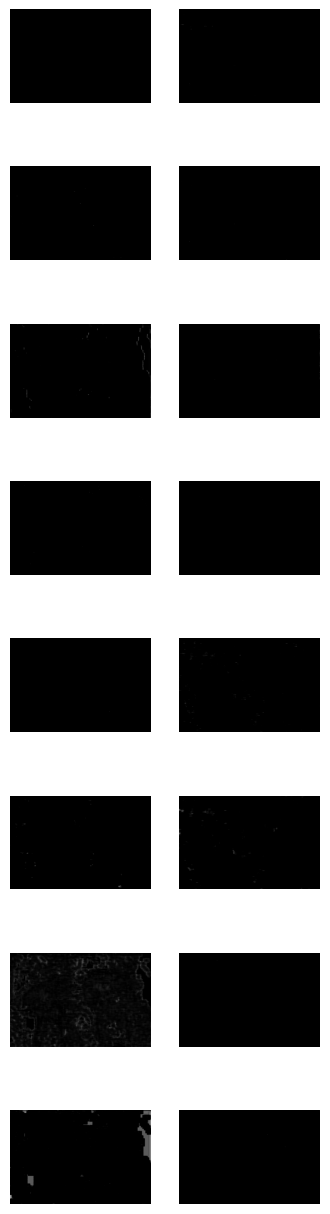

In [202]:
fig, axs = plt.subplots(8, 2, figsize=(4, 16))
for i in range(8):
    im = axs[i,0].imshow(res10[i+54], cmap="gray")
    axs[i,1].imshow(res90[i+54], cmap="gray")
    axs[i,0].set_axis_off()
    axs[i,1].set_axis_off()